In [1]:
import sys
sys.path.append("..")

import json

experiment = 'cifar'
directory_results = 'results/'
 
with open(directory_results+experiment+'-BBI.json', 'r') as f:
    bestrun_BBI = json.load(f)
 
with open(directory_results+experiment+'-sgd.json', 'r') as f:
    bestrun_sgd = json.load(f)
        
with open(directory_results+'best-parameters-'+experiment+'.json', 'r') as f:
    bestpar = json.load(f)

with open(directory_results+'scanning-parameters-'+experiment+'.json', 'r') as f:
    scanningpar = json.load(f)
    

In [3]:
print('Parameters used for this scan:\n')
for key in list(scanningpar):
    print(key,":", scanningpar[key])

Parameters used for this scan:

tune_epochs : 3
n_trials : 50
check_epochs : 150
seed : 42
sgd : {'stepsize': [0.001, 0.2], 'rho': [0.8, 1.0]}
problem : None
BBI : {'stepsize': [0.001, 0.2]}
comments : test Experiment. Fixed BBI pars:

threshold_BBI: 2000
threshold0_BBI: 100
consEN_BBI: True
nFixedBounces_BBI: 100
deltaEn: 0.0


In [4]:
print('Results at the end of the long run with the best parameters:\n')

for key in list(bestrun_sgd):
    if key!= 'epoch':
        print(key)
        print("\tsgd:", bestrun_sgd[key][-1])
        print("\tBBI:", bestrun_BBI[key][-1])

Results at the end of the long run with the best parameters:

acc test
	sgd: 0.9304
	BBI: 0.9264
acc train
	sgd: 0.99838
	BBI: 0.99976
loss test
	sgd: 0.4659972184896469
	BBI: 0.5299306799471378
loss train
	sgd: 0.004608505815139722
	BBI: 0.0010823722794138613


In [5]:
from IPython.display import Image
optimizers = ['sgd','BBI']

sgd
 Best parameters:  {'rho': 0.8466591373818418, 'stepsize': 0.016285456721072053}


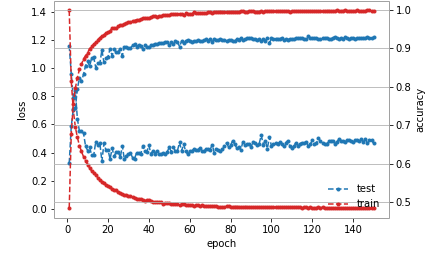

In [6]:
opt = optimizers[0]
print(opt+"\n","Best parameters: ", bestpar[opt])
Image(filename=directory_results+experiment+'-'+opt+'.png') 

BBI
 Best parameters:  {'stepsize': 0.062202679268981535}


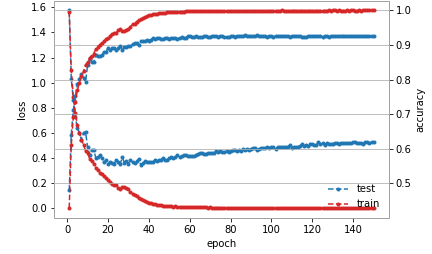

In [7]:
opt = optimizers[1]
print(opt+"\n","Best parameters: ", bestpar[opt])
Image(filename=directory_results+experiment+'-'+opt+'.png') 

In [8]:
# Here we can run the experiment more times to get statistics

""" This file is the main starting point for all experiments """
import torch
import torch.nn as nn
import torch.optim as optim
import torch.backends.cudnn as cudnn
import os
import argparse
import sys
from inflation import BBI

import numpy as np 
from experiments.cifar import cifar

from run_experiment_hyperopt import *

from hyperopt import hp, tpe, Trials, fmin

experiment = "cifar"

problem_number = None

#fixed BBI parameters
threshold_BBI = 2000
threshold0_BBI = 100
consEn_BBI = True
nFixedBounces_BBI = 100
deltaEn = 0.0



In [9]:
seed = 42

def run_experiment_sgd_name_seed(epochs = 2, name = "sgd", seed = seed, stepsize = 1e-3, rho = .99):
    param_list = ["main.py", experiment, "--optimizer", "sgd",
                           "--lr", str(stepsize), "--rho", str(rho),
                           "--epochs", str(epochs), "--seed", str(seed),
                           "--progress", "false", "--device", "cuda", "-n", name]
    if experiment == "PDE_PoissonD": 
        param_list.append("--problem")
        param_list.append(str(problem_number))
    
    return run_experiment(param_list)
    

def run_experiment_BBI_name(epochs = 2, name = "BBI", stepsize = 1e-3, threshold = threshold_BBI, threshold0 = threshold0_BBI, consEn = consEn_BBI, nFixedBounces = nFixedBounces_BBI, deltaEn = deltaEn):
    param_list = ["main.py", experiment, "--optimizer", "BBI",
                           "--lr", str(stepsize),
                           "--epochs", str(epochs),"--seed", str(seed),
                           "--threshold", str(threshold),
                           "--threshold0", str(threshold0),
                           "--nFixedBounces", str(nFixedBounces),
                           "--deltaEn", str(deltaEn),
                           "--consEn", str(consEn),
                           "--progress", "false","--device", "cuda", "-n", name]
    if experiment == "PDE_PoissonD": 
        param_list.append("--problem")
        param_list.append(str(problem_number))
        
    return run_experiment(param_list)


In [ ]:
best_par_sgd = bestpar['sgd']
epochs_check = 150
nruns = 10
seeds = [42, 27, 313, 5, 99, 429,42892, 318,242984,1042042,4209420,2,48,488429,19428,4289,1568,5920,2381,5502,48572,2385,111,234,4456,5,7,343,64,12,73]
nruns_start = 0
for i in range(nruns_start,nruns):
    print(i)
    run_experiment_sgd_name_seed(epochs=epochs_check,name = "sgd-"+str(i), seed = seeds[i], **best_par_sgd)


In [ ]:
best_par_BBI = bestpar['BBI']
epochs_check = 150
nruns = 10
nruns_start = 0
for i in range(nruns_start,nruns):
    print(i)
    run_experiment_BBI_name(epochs=epochs_check,name = "BBI-"+str(i), **best_par_BBI)


In [14]:
#These are the new runs
nruns = 10
all_results_sgd = []
all_results_bbi = []

for i in range(nruns):
    with open(directory_results+'sgd-'+str(i)+'.json', 'r') as f:
        all_results_sgd.append(json.load(f))
    with open(directory_results+'BBI-'+str(i)+'.json', 'r') as f:
        all_results_bbi.append(json.load(f))
        


In [15]:
accs_sgd = []
accs_bbi = []

#These are the new runs
for i in range(nruns):
    accs_sgd.append(all_results_sgd[i]['acc test'][-1])
    accs_bbi.append(all_results_bbi[i]['acc test'][-1])
    
# This is the previous run
accs_sgd.append(bestrun_sgd['acc test'][-1])
accs_bbi.append(bestrun_BBI['acc test'][-1])

In [ ]:
#These are not the same runs in the paper (less statistics), but the results are comparable.

In [16]:
print("SGD:")
print(accs_sgd)
print("\tMean: ", torch.mean(torch.tensor(accs_sgd)).item())
print("\tStd: ", torch.std(torch.tensor(accs_sgd)).item())

SGD:
[0.9304, 0.9266, 0.9288, 0.9245, 0.926, 0.9269, 0.9284, 0.9272, 0.9278, 0.9294, 0.9304]
	Mean:  0.927854597568512
	Std:  0.001847904291935265


In [17]:
print("BBI:")
print(accs_bbi)
print("\tMean: ", torch.mean(torch.tensor(accs_bbi)).item())
print("\tStd: ", torch.std(torch.tensor(accs_bbi)).item())

BBI:
[0.928, 0.9224, 0.925, 0.9275, 0.9273, 0.924, 0.9261, 0.927, 0.926, 0.9263, 0.9264]
	Mean:  0.9259999990463257
	Std:  0.0016480208141729236
